---

# Widths of candles, wicks, ohlc ticks, volume bars

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
df = pd.read_csv('../../data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
df.shape
df.head(2)
df.tail(2)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


In [4]:
import mplfinance as mpf
mpf.__version__

'0.12.5a3'

In [5]:
setup = dict(type='candle',volume=True,figscale=0.8,mav=(10,20,30))

In [6]:
#mpf.plot(df.iloc[0: 40],**setup,width_adjuster_version='v0')
#mpf.plot(df.iloc[0: 80],**setup,width_adjuster_version='v0')
#mpf.plot(df.iloc[0:150],**setup,width_adjuster_version='v0')

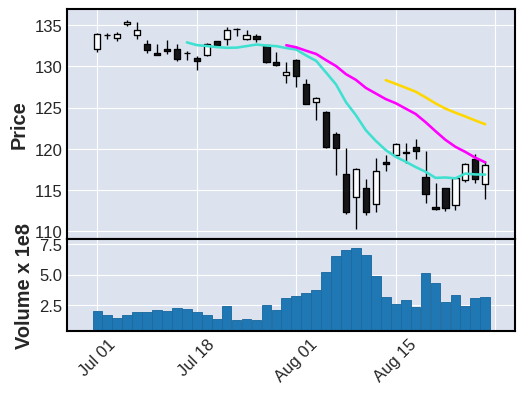

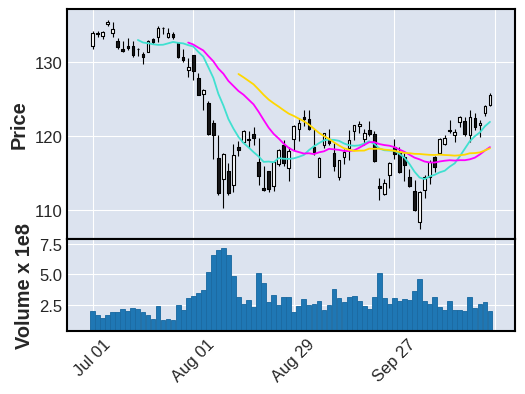

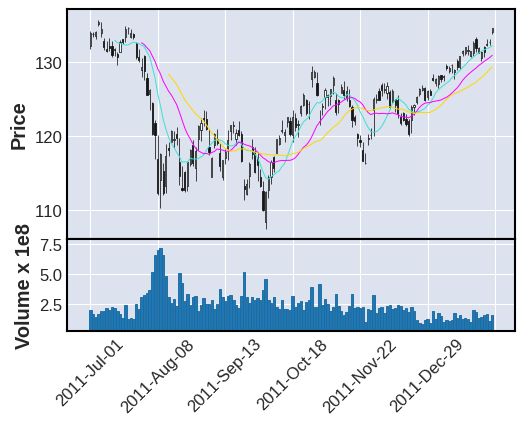

In [7]:
mpf.plot(df.iloc[0: 40],**setup)
mpf.plot(df.iloc[0: 80],**setup)
mpf.plot(df.iloc[0:150],**setup)

---

---

**Now let's see** the same three plots using the **new** algorithm:

In [8]:
0.665*0.98
0.665*0.825

0.6517000000000001

0.548625

In [9]:
STOP HERE

SyntaxError: invalid syntax (<ipython-input-9-a6774c8535dd>, line 1)

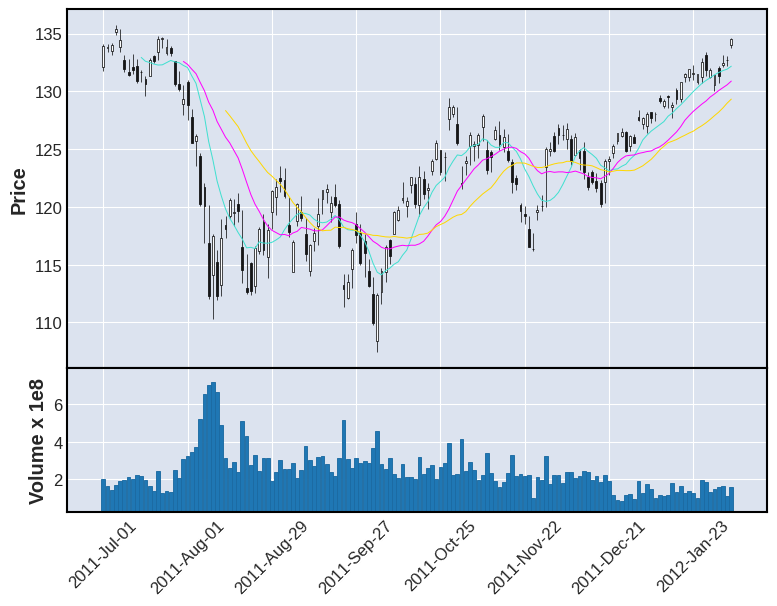

{'candle_linewidth': 0.5,
 'candle_width': 0.435,
 'line_width': 0.715,
 'ohlc_linewidth': 0.525,
 'ohlc_ticksize': 0.35,
 'volume_linewidth': 0.65,
 'volume_width': 0.9}


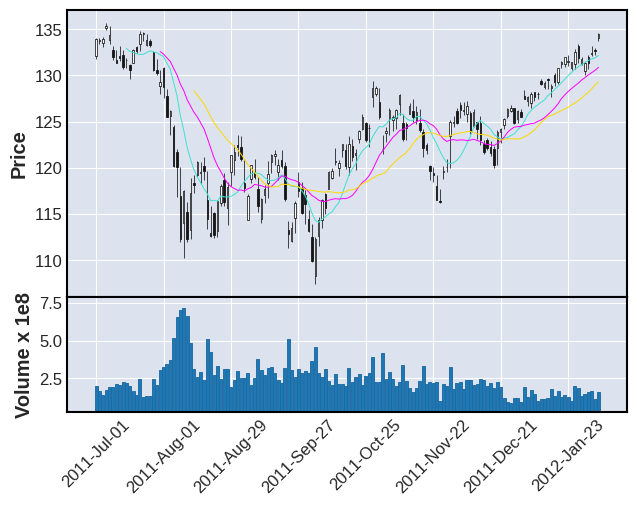

{'candle_linewidth': 0.5,
 'candle_width': 0.435,
 'line_width': 0.715,
 'ohlc_linewidth': 0.525,
 'ohlc_ticksize': 0.35,
 'volume_linewidth': 0.65,
 'volume_width': 0.9}


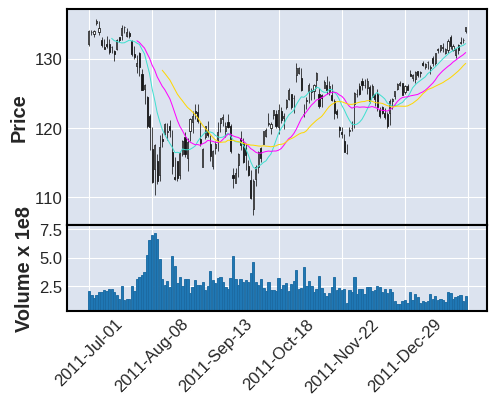

{'candle_linewidth': 0.5,
 'candle_width': 0.435,
 'line_width': 0.715,
 'ohlc_linewidth': 0.525,
 'ohlc_ticksize': 0.35,
 'volume_linewidth': 0.65,
 'volume_width': 0.9}


In [10]:
import pprint as pp
setup = dict(type='candle',volume=True,figscale=1.25,mav=(10,20,30))

wconfig = {}
setup['figscale'] = 1.25
mpf.plot(df.iloc[0:150],**setup,return_width_config=wconfig)#,scale_width_adjustment=dict(candle=1.25))
pp.pprint(wconfig)

wconfig = {}
setup['figscale'] = 1.0
mpf.plot(df.iloc[0:150],**setup,return_width_config=wconfig)#,scale_width_adjustment=dict(candle=1.25))
pp.pprint(wconfig)

wconfig = {}
setup['figscale'] = 0.75
mpf.plot(df.iloc[0:150],**setup,return_width_config=wconfig)#,scale_width_adjustment=dict(candle=1.25))
pp.pprint(wconfig)

In [11]:
volume_width     = (0.98, 0.96,  0.95,  0.925,  0.9,  0.9,  0.875, 0.825 )
volume_width  
candle_width     = (0.65, 0.575, 0.50, 0.425, 0.350, 0.312, 0.312, 0.321)
candle_width  
new_candle_width = tuple([v * 0.48 for v in volume_width])
new_candle_width

ncw2 = tuple([v*1.25 for v in candle_width])
ncw2

(0.98, 0.96, 0.95, 0.925, 0.9, 0.9, 0.875, 0.825)

(0.65, 0.575, 0.5, 0.425, 0.35, 0.312, 0.312, 0.321)

(0.4704,
 0.4608,
 0.45599999999999996,
 0.444,
 0.432,
 0.432,
 0.42,
 0.39599999999999996)

(0.8125, 0.71875, 0.625, 0.53125, 0.4375, 0.39, 0.39, 0.40125)

In [12]:
wdf = pd.DataFrame({'vw':volume_width,'cw':candle_width,'Ncw':new_candle_width,'N2cw':ncw2})
wdf

,vw,cw,Ncw,N2cw
0,0.980,0.650,0.4704,0.81250
1,0.960,0.575,0.4608,0.71875
2,0.950,0.500,0.4560,0.62500
3,0.925,0.425,0.4440,0.53125
4,0.900,0.350,0.4320,0.43750
5,0.900,0.312,0.4320,0.39000
6,0.875,0.312,0.4200,0.39000
7,0.825,0.321,0.3960,0.40125


In [13]:
ohlc_linewidth   = (1.50, 1.175, 0.85, 0.525, 0.525, 0.525, 0.525, 0.525)
line_linewidth   = [1.35*v for v in ohlc_linewidth]
line_linewidth

[2.0250000000000004,
 1.5862500000000002,
 1.1475,
 0.7087500000000001,
 0.7087500000000001,
 0.7087500000000001,
 0.7087500000000001,
 0.7087500000000001]

In [14]:
a125 = {'candle_linewidth': 0.5,
 'candle_width': 0.4375,
 'ohlc_linewidth': 0.525,
 'ohlc_ticksize': 0.35,
 'volume_linewidth': 0.65,
 'volume_width': 0.9}

ap48 = {'candle_linewidth': 0.5,
 'candle_width': 0.432,
 'ohlc_linewidth': 0.525,
 'ohlc_ticksize': 0.35,
 'volume_linewidth': 0.65,
 'volume_width': 0.9}

orig = {'candle_linewidth': 0.5,
 'candle_width': 0.35,
 'ohlc_linewidth': 0.525,
 'ohlc_ticksize': 0.35,
 'volume_linewidth': 0.65,
 'volume_width': 0.9}

a125['candle_width']
ap48['candle_width']
orig['candle_width']

0.4375

0.432

0.35

In [15]:
0.35*1.25

0.4375

In [16]:
#s = mpf.make_mpf_style(base_mpf_style='default',rc={'lines.linewidth':0.75})
s1 = mpf.make_mpf_style(base_mpf_style='default')#,rc={'patch.linewidth':0.75})
s2 = mpf.make_mpf_style(base_mpf_style='default',rc={'patch.linewidth':0.75})
s3 = mpf.make_mpf_style(base_mpf_style='default',rc={'lines.linewidth':0.75})

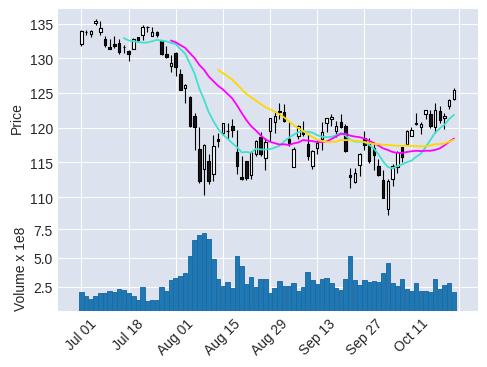

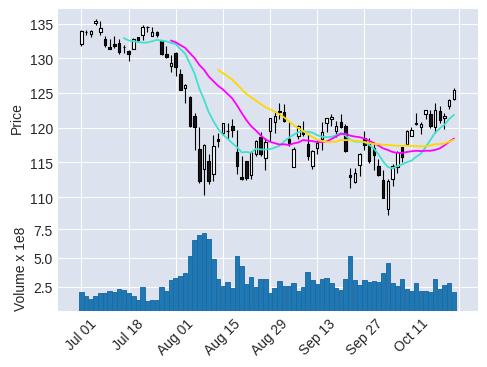

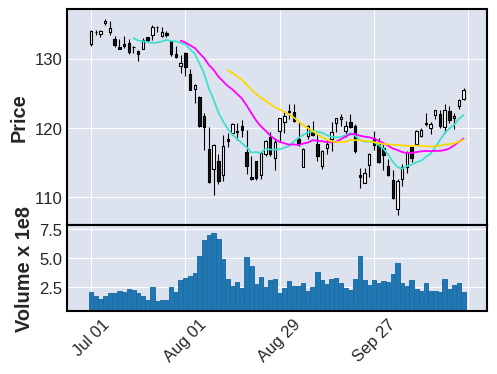

In [17]:
#mpf.plot(df.iloc[0: 40],**setup,style=s1)
#mpf.plot(df.iloc[0: 40],**setup,style=s2)
mpf.plot(df.iloc[0: 80],**setup,style=s3)
mpf.plot(df.iloc[0: 80],**setup,style=s2)
mpf.plot(df.iloc[0: 80],**setup,style=s1)
#mpf.plot(df.iloc[0:150],**setup,style=s1)
#mpf.plot(df.iloc[0:150],**setup,style=s2)

In [ ]:
STOP HERE

   NEW 


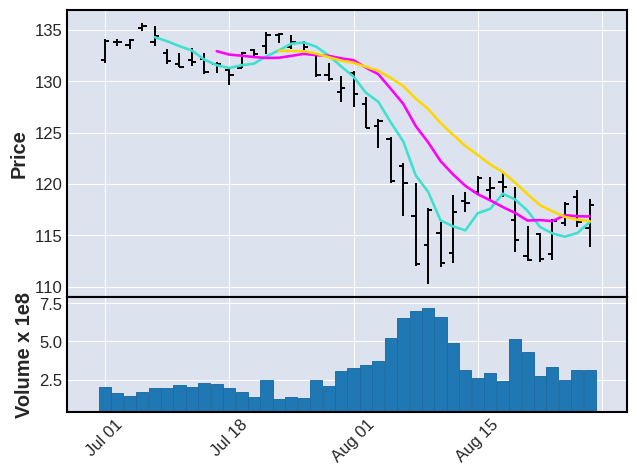

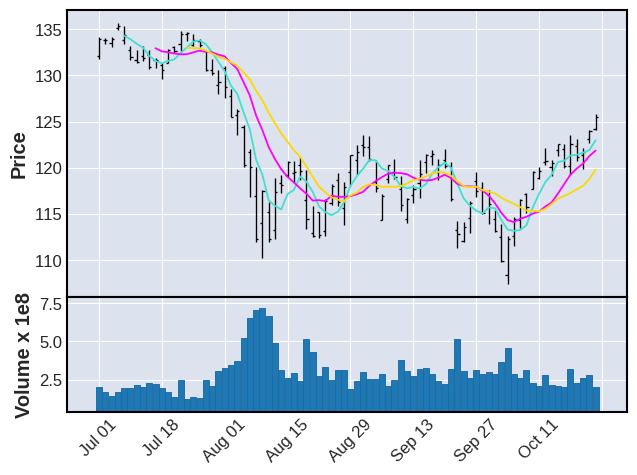

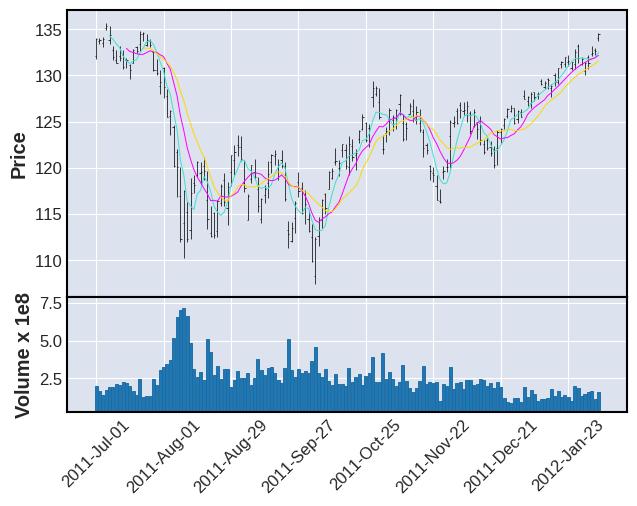

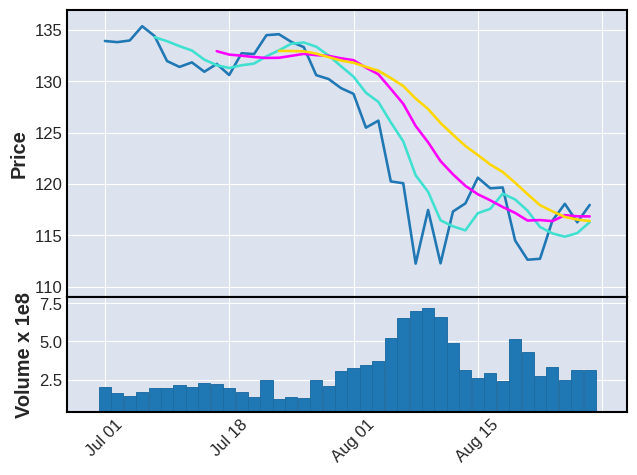

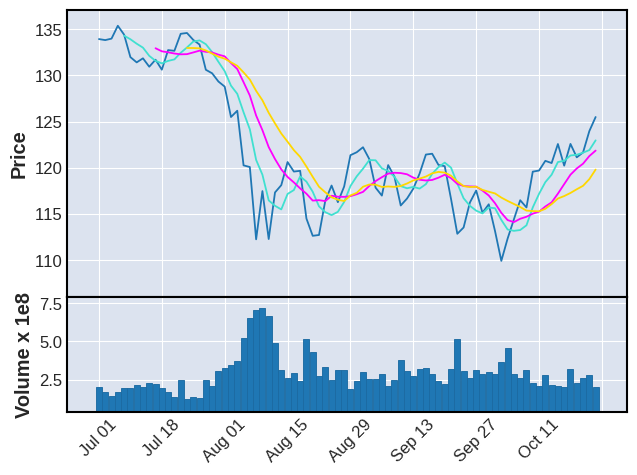

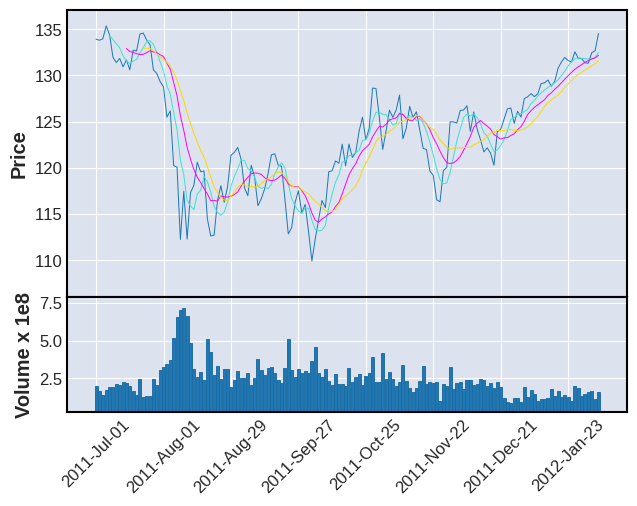

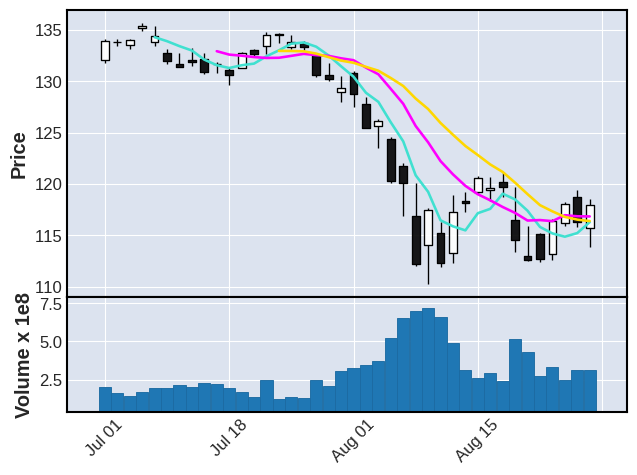

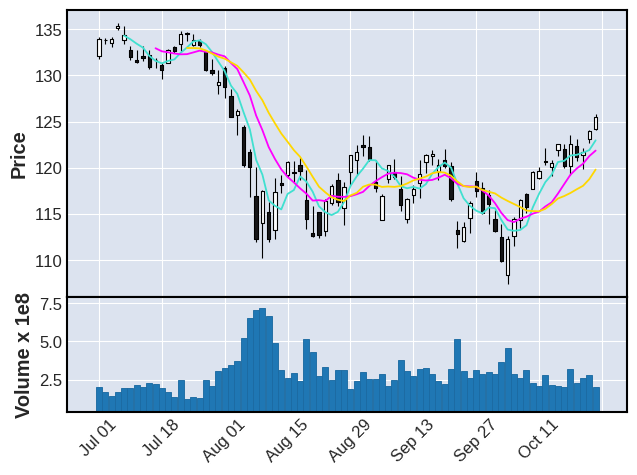

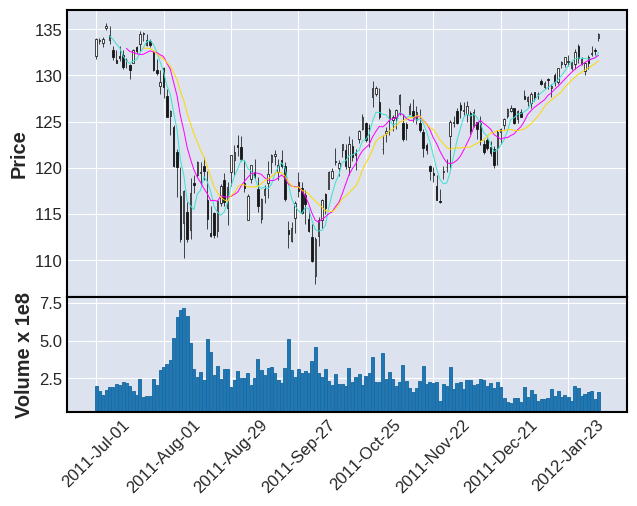

In [19]:
setup = dict(type='ohlc',volume=True)
print('=====================================================================')
print('''=========
   NEW 
=========''')

setup.update(dict(mav=(5,10,15)))

mpf.plot(df.iloc[0: 40],**setup)
mpf.plot(df.iloc[0: 80],**setup)
mpf.plot(df.iloc[0:150],**setup)

setup['type']='line'
mpf.plot(df.iloc[0: 40],**setup)
mpf.plot(df.iloc[0: 80],**setup)
mpf.plot(df.iloc[0:150],**setup)

setup['type']='candle'
mpf.plot(df.iloc[0: 40],**setup)
mpf.plot(df.iloc[0: 80],**setup)
mpf.plot(df.iloc[0:150],**setup)


In [ ]:
setup = dict(type='candle',volume=True,figscale=1.25)
mpf.plot(df.iloc[0:80],**setup)
mpf.plot(df.iloc[0:80],**setup,scale_width_adjustment=dict(volume=1.35,candle=0.75))

In [ ]:
setup = dict(type='ohlc',volume=True,figscale=1.25)
mpf.plot(df.iloc[0:80],**setup)
mpf.plot(df.iloc[0:80],**setup,scale_width_adjustment=dict(ohlc=1.75,volume=0.5))

---
### Manual customization of candle, ohlc and volume widths:

Now suppose we want to simply *override* what the "width adjuster" algorithm is doing, for one or more aspects of the plot.  As a general rule, I would advise *against* doing this.  But if you want to experiment, here is how.

This is where we need to understand that each of the three items (candle,ohlc,volume) is subdivided into two parts.  This gives us a total of six width configuration keywords:



| Item   | Keyword          | Description
|:----   |:--------------   |:--------------------------------- |
| ohlc &nbsp;&nbsp;&nbsp;&nbsp;  | ohlc_ticksize &nbsp;&nbsp;&nbsp;&nbsp;   | horizontal length of left/right ticks 
|        | ohlc_linewidth   | thickness of ohlc lines
| candle &nbsp;&nbsp;&nbsp;&nbsp; | candle_width &nbsp;&nbsp;&nbsp;&nbsp;    | horizontal thickness of the candle body
|        | candle_linewidth &nbsp;&nbsp;&nbsp;&nbsp;| thickness of candle edge **and** its wick
| volume &nbsp;&nbsp;&nbsp;&nbsp;| volume_width     | horizontal thickness of volume bars
|        | volume_linewidth &nbsp;&nbsp;&nbsp;&nbsp;| thickness of edge surrounding volume bar &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

We can override any one of the six keywords in the above table using kwarg **` update_width_config `**.  We pass this kwarg a `dict()` containing one or more of the six keywords listed above.  The exact value we pass in will be used instead of the value generated by the width adjuster algorithm.  But for those items that we do not specify, the algorithm's value will be used (possibly modified by `scale_width_adjustment`).  Note that values set by **`update_width_config`** are taken exactly, and are ***not*** affected by `scale_width_adjustment`.

**A note of warning** about the values in the width configuration.  These values can vary greatly depending upon the data, ***especially if the user sets*** ` show_nontrading=True `, which can cause large changes to the width configuration values depending on the frequency (intraday, weekly, monthly, etc) of the data.

To mitigate the possibility of setting the width configuration to values that may not make sense, **you can see** the generated width configuration values using kwarg **` 'return_width_config' `**.  Simply set this kwarg equal to an **empty `dict()`** and mplfinance will return the width configuration values in the dict.  

**For example:**

In [ ]:
import pprint as pp

setup=dict(type='candle',volume=True,figscale=0.75)

wconfig = {}
mpf.plot(df.iloc[0:80],**setup,return_width_config=wconfig)
pp.pprint(wconfig)

wconfig={}
mpf.plot(df.iloc[0:80],**setup,return_width_config=wconfig,show_nontrading=True)
pp.pprint(wconfig)

---
---

**Notice** in the next example, with intraday data, some of the width configuration values for `show_nontrading` are very different from those without `show_nontrading` ***yet the plots look almost identical.***

In [ ]:
idf = pd.read_csv('data/SP500_20191106_IDayBollinger.csv',index_col=0,parse_dates=True)
setup=dict(type='candle',figscale=0.75)

wconfig = {}
mpf.plot(idf.iloc[0:80],**setup,return_width_config=wconfig)
pp.pprint(wconfig)

wconfig={}
mpf.plot(idf.iloc[0:80],**setup,return_width_config=wconfig,show_nontrading=True)
pp.pprint(wconfig)

---
---

**Now that we have an idea** of what the values in width configuration look like, we can play with them to see how it affects our plot:

In [ ]:
mpf.plot(idf.iloc[0:40],type='candle')
mpf.plot(idf.iloc[0:40],type='candle',update_width_config=dict(candle_linewidth=1.75))

In [ ]:
mpf.plot(idf.iloc[0:40],type='candle',update_width_config=dict(candle_linewidth=0.4))

In [ ]:
mpf.plot(idf.iloc[0:40],type='candle',update_width_config=dict(candle_linewidth=0.4,candle_width=1.6))